In [ ]:
from pathlib import Path
import tensorflow as tf
import sys

In [ ]:
project_path = Path(__file__).parent.parent

In [ ]:
sys.path.append(project_path)
from finetune_service import fine_tune

In [ ]:
data_path = Path("data")
model_label = "mobilenetv2"

In [9]:
train_path = data_path / "train.csv"
valid_path = data_path / "valid.csv"
test_path = data_path / "test.csv"

In [10]:
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)
BATCH_SIZE = 32

In [11]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights="imagenet",
)

base_model_layer_name = base_model.name
last_conv_layer_name = "out_relu"
pre_process = tf.keras.applications.mobilenet_v2.preprocess_input

Found 76410 validated image filenames.
Found 9551 validated image filenames.
Found 9551 validated image filenames.
Start training classifier


2026-01-15 11:11:19.913746: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 90501


299/299 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - auc: 0.4880 - loss: 1.0117
initial loss: 1.01
initial auc: 0.49
Epoch 1/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 264s 108ms/step - auc: 0.5651 - loss: 0.4719 - val_auc: 0.6473 - val_loss: 0.4190
Epoch 2/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 254s 106ms/step - auc: 0.6190 - loss: 0.4300 - val_auc: 0.6694 - val_loss: 0.4091
Epoch 3/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - auc: 0.6420 - loss: 0.4173 - val_auc: 0.6785 - val_loss: 0.4064
Epoch 4/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - auc: 0.6536 - loss: 0.4115 - val_auc: 0.6827 - val_loss: 0.4043
Epoch 5/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - auc: 0.6623 - loss: 0.4081 - val_auc: 0.6860 - val_loss: 0.4038
Epoch 6/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - auc: 0.6673 - loss: 0.4063 - val_auc: 0.6879 - val_loss: 0.4025
Epoch 7/10
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 258s 108ms/step - auc: 0.6695 - loss: 0.4052 - val_auc: 0.6887 - val_loss: 0.4026
Epoch 8/10
2388/2388 ━━

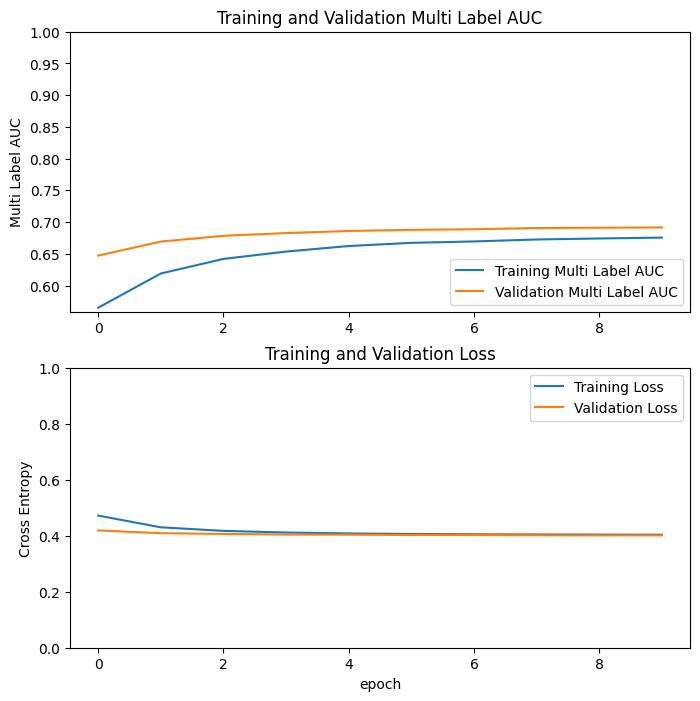

Let's select the best checkpoint based on multi label auc:
model_epoch_01.keras      | Test: 0.6455 | Val: 0.6473 | Gap: 0.0018
model_epoch_02.keras      | Test: 0.6688 | Val: 0.6694 | Gap: 0.0006
model_epoch_03.keras      | Test: 0.6773 | Val: 0.6785 | Gap: 0.0011
model_epoch_04.keras      | Test: 0.6832 | Val: 0.6827 | Gap: -0.0004
model_epoch_05.keras      | Test: 0.6863 | Val: 0.6860 | Gap: -0.0003
model_epoch_06.keras      | Test: 0.6878 | Val: 0.6879 | Gap: 0.0000
model_epoch_07.keras      | Test: 0.6891 | Val: 0.6887 | Gap: -0.0003
model_epoch_08.keras      | Test: 0.6906 | Val: 0.6907 | Gap: 0.0001
model_epoch_09.keras      | Test: 0.6906 | Val: 0.6912 | Gap: 0.0006
model_epoch_10.keras      | Test: 0.6918 | Val: 0.6916 | Gap: -0.0002

Best checkpoint: model_epoch_10.keras with test multi label auc = 0.6918
Start finetuning classifier
Number of layers in the base model:  154
Number of trainable variables in the model:  88
Epoch 11/20
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 524s 208ms/st

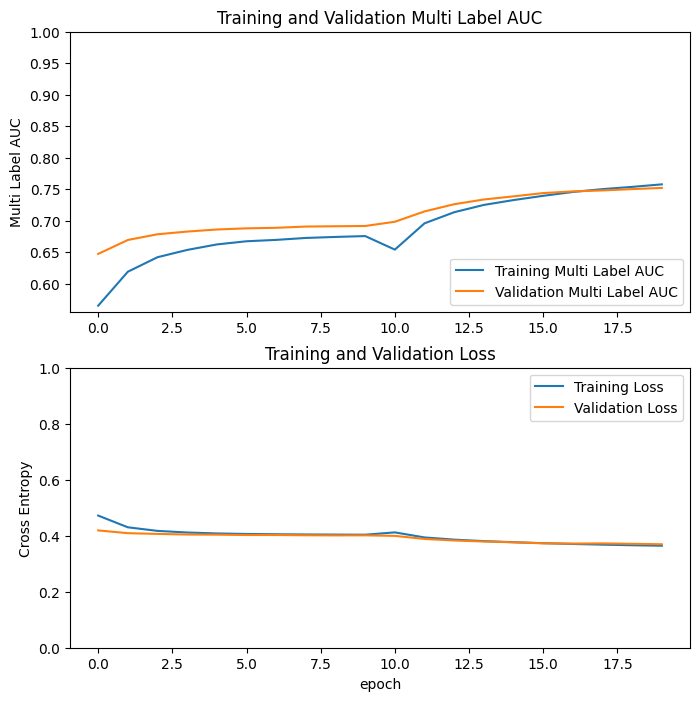

Let's select the best checkpoint based on multi label auc:
model_epoch_11.keras      | Test: 0.7005 | Val: 0.6983 | Gap: -0.0022
model_epoch_12.keras      | Test: 0.7154 | Val: 0.7147 | Gap: -0.0007
model_epoch_13.keras      | Test: 0.7272 | Val: 0.7261 | Gap: -0.0011
model_epoch_14.keras      | Test: 0.7349 | Val: 0.7337 | Gap: -0.0012
model_epoch_15.keras      | Test: 0.7404 | Val: 0.7386 | Gap: -0.0018
model_epoch_16.keras      | Test: 0.7452 | Val: 0.7438 | Gap: -0.0014
model_epoch_17.keras      | Test: 0.7483 | Val: 0.7465 | Gap: -0.0018
model_epoch_18.keras      | Test: 0.7498 | Val: 0.7480 | Gap: -0.0018
model_epoch_19.keras      | Test: 0.7510 | Val: 0.7502 | Gap: -0.0009
model_epoch_20.keras      | Test: 0.7537 | Val: 0.7520 | Gap: -0.0017

Best checkpoint: model_epoch_20.keras with test multi label auc = 0.7537
299/299 ━━━━━━━━━━━━━━━━━━━━ 29s 91ms/step
Individual auc for each pathology:
No Finding: AUC = 0.8692
Enlarged Cardiomediastinum: AUC = 0.6047
Cardiomegaly: AUC = 0.8

In [12]:
fine_tune(
    train_path=train_path,
    val_path=valid_path,
    test_path=test_path,
    batch_size=BATCH_SIZE,
    img_size=IMG_SIZE,
    base_model=base_model,
    base_model_layer_name=base_model_layer_name,
    pre_process=pre_process,
    dropout=0.4,
    lr_classifier=10e-5,
    epochs_classifier=10,
    cp_path=project_path / "models" / model_label / "cp",
    fine_tune_at=70,
    lr_finetune=10e-6,
    epochs_finetune=10,
    model_save_path=project_path / "models" / model_label,
    last_conv_layer_name=last_conv_layer_name,
)